In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, chi2
import random
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
# import shap
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import numpy as np
import tqdm
import copy
import xgboost as xgb
import lightgbm as lgb
# from catboost import CatBoostClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.feature_selection import RFECV
from torch.optim import AdamW
from torch.optim import SGD
import torch.nn.init as init
from torch.optim.lr_scheduler import CyclicLR
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import f1_score
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import confusion_matrix
from sklearn.calibration import calibration_curve
import re

In [37]:
translated_columns = ['date', 'time', 'Thirst', 'caffeine', 'startAnswering', 'Yawning',
       'anxiety', 'HA new', 'alcohol', 'depression', 'neck pain',
       'Sleepiness', 'vegetative', 'subnausea', 'feeling hungry',
       "urination", "eye strain", "enough water?",
       'cheese, choco, citrus', 'Expecting a migraine', 'Workaholism',
       'Wanted chocolate', 'Feeling tired', 'Irritability',
       "Any pungent odors?", "Skipping meals", "Scalp sensitivity",
       'Physical activity', 'More sound than usual',
       'Difficulty concentrating', 'More light than usual',
       'Sensitivity to sound', 'Sensitivity to light',
       'Sensitivity to odors', 'id', 'flights', 'what day',
       'day 1 of menstruation', '% diary completion', 'aura', 'nausea',
       'YOUR max', 'Name', 'throbbing', 'Pain now', 'Pain onset',
       'Quality of sleep', 'unilateral', 'Analgesic', 'Freshness after sleep',
       'noticed provocateur', 'amplification by movement', 'sleep duration',
       'sensitivity to sound', 'sensitivity to light',
       'sensitivity to odors', 'HA continuation', 'End of pain',
       'comment', 'what trigger']

In [38]:
len(translated_columns)

60

1 = yes, 2 = no

In [39]:
nausea_dataset_1 = pd.read_csv("nausea_dataset_1.csv")
nausea_dataset_2 = pd.read_csv("nausea_dataset_2.csv")
nausea_dataset_1 = nausea_dataset_1.drop(columns=["тошнота"])
nausea_dataset_2 = nausea_dataset_2.drop(columns=["тошнота"])
nausea_dataset_2["ГБ новая"] = nausea_dataset_2["ГБ новая"].replace({"да": 0})
print(nausea_dataset_1.shape)
print(nausea_dataset_2.shape)

(1754, 54)
(4692, 54)


In [40]:
light_dataset_1 = pd.read_csv("light_dataset_1.csv")
light_dataset_2 = pd.read_csv("light_dataset_2.csv")
light_dataset_1 = light_dataset_1.drop(columns=["чувствительность к свету"])
light_dataset_2 = light_dataset_2.drop(columns=["чувствительность к свету"])
light_dataset_2["ГБ новая"] = light_dataset_2["ГБ новая"].replace({"да": 0})
print(light_dataset_1.shape)
print(light_dataset_2.shape)

(3297, 54)
(3149, 54)


In [41]:
sound_dataset_1 = pd.read_csv("sound_dataset_1.csv")
sound_dataset_2 = pd.read_csv("sound_dataset_2.csv")
sound_dataset_1 = sound_dataset_1.drop(columns=["чувствительность к звуку"])
sound_dataset_2 = sound_dataset_2.drop(columns=["чувствительность к звуку"])
sound_dataset_2["ГБ новая"] = sound_dataset_2["ГБ новая"].replace({"да": 0})
print(sound_dataset_1.shape)
print(sound_dataset_2.shape)

(3414, 54)
(3032, 54)


In [42]:
smell_dataset_1 = pd.read_csv("smell_dataset_1.csv")
smell_dataset_2 = pd.read_csv("smell_dataset_2.csv")
smell_dataset_1 = smell_dataset_1.drop(columns=["тошнота", "Unnamed: 0"])
smell_dataset_2 = smell_dataset_2.drop(columns=["тошнота", "Unnamed: 0"])
smell_dataset_2["ГБ новая"] = smell_dataset_2["ГБ новая"].replace({"да": 0})
print(smell_dataset_1.shape)
print(smell_dataset_2.shape)

(1802, 54)
(4644, 54)


In [43]:
smell_dataset_2

,Жажда,кофеин,Зевания,Тревога,ГБ новая,Алкоголь,Депрессия,боль в шее,Сонливость,вегетатика,...,Свежесть после сна,заметил провокатор,усиление движением,Продолжительность сна,чувствительность к звуку,чувствительность к свету,чувствительность к запахам,ГБ продолжение,Окончание боли,какой триггер
0,да,нет,нет,1,0.0,нет,2,да,2,да,...,2.0,нет,да,06:30,да,нет,нет,NaN,NaN,NaN
1,да,нет,нет,3,0.0,нет,4,да,2,нет,...,3.0,нет,да,06:30,нет,нет,нет,NaN,NaN,NaN
2,да,нет,нет,2,NaN,нет,3,да,3,нет,...,NaN,нет,NaN,NaN,да,нет,нет,нет,NaN,NaN
3,да,нет,нет,1,0.0,нет,2,да,2,нет,...,3.0,нет,да,09:00,нет,да,нет,NaN,NaN,NaN
4,нет,нет,нет,1,NaN,нет,1,нет,2,нет,...,NaN,нет,NaN,NaN,нет,нет,нет,нет,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4639,да,нет,нет,3,NaN,да,3,да,4,нет,...,NaN,нет,NaN,NaN,нет,нет,нет,нет,NaN,NaN
4640,нет,да,нет,2,NaN,нет,3,да,4,нет,...,1.0,нет,NaN,07:00,да,нет,нет,нет,NaN,NaN
4641,да,да,да,3,0.0,нет,3,да,4,да,...,NaN,нет,да,NaN,да,да,нет,NaN,NaN,NaN
4642,да,да,нет,3,0.0,нет,3,да,5,нет,...,NaN,нет,да,NaN,да,да,нет,NaN,NaN,NaN


#Prep

In [44]:
def preprocess_data(data):
    data.dropna(subset=["ГБ новая"], inplace=True)
    data = data.drop(data.iloc[:, 27:54],axis = 1)
    data.dropna(inplace=True)
    data["ГБ новая"] = data["ГБ новая"].replace({'да': 1, 'нет': 0})
    data = data.drop(columns=["Ожидаете мигрень", "Физическая ативность"], axis=1)
    categorical_columns = [
                            "сыр, шоко, цитрус"]
    binary_columns = ['Жажда', 'кофеин', 'Зевания', 'Алкоголь'
                        , "боль в шее", "вегетатика", "подташнивает",
                        "мочеиспускание", "Напряжение глаз", "Воды достаточно?", "Были резкие запахи?",
                          "Пропуск приема пищи", "Чувствит кожи головы", 'Больше звука чем обычно', 'Сложность концентрации',
                        "Хотелось шоколада"]
    quantitative_columns = ["Тревога", "Депрессия", "Сонливость", "Чувство голода",
                              "Работосособность", "Чувство усталости", "Раздражительность"

                              ]
    data["ГБ новая"] = data["ГБ новая"].astype(int)
    target = data["ГБ новая"]
    y = data["ГБ новая"].values
    data = data.drop(columns = ["ГБ новая"], axis=1)

    for column in binary_columns:
        data[column] = data[column].replace({'да': 1, 'нет': 0})

    data = pd.get_dummies(data, columns=categorical_columns+quantitative_columns+binary_columns)
    return data, y

In [45]:
data_nausea, y_nausea = preprocess_data(pd.concat([nausea_dataset_1, nausea_dataset_2]))
data_nausea_2, y_nausea_2 = preprocess_data(nausea_dataset_2)

data_light, y_light = preprocess_data(pd.concat([light_dataset_1, light_dataset_2]))
data_light_2, y_light_2 = preprocess_data(light_dataset_2)

data_sound, y_sound = preprocess_data(pd.concat([sound_dataset_1, sound_dataset_2]))
data_sound_2, y_sound_2 = preprocess_data(sound_dataset_2)

data_smell, y_smell = preprocess_data(pd.concat([smell_dataset_1, smell_dataset_2]))
data_smell_2, y_smell_2 = preprocess_data(smell_dataset_2)

# ML

In [46]:
def calculate_metrics(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    return sensitivity, specificity

In [47]:
def preprocess_data(data):
    data.columns = translated_columns
    data["HA new"] = data["HA new"].replace({np.NaN: 0})
    data.dropna(subset=["HA new"], inplace=True)
    data = data.drop(data.iloc[:, 27:58],axis = 1)
    columns_to_drop = ["comment", "what trigger"]
    data = data.drop(columns=columns_to_drop)
    data.dropna(inplace=True)
    data["HA new"] = data["HA new"].replace({'да': 1, 'нет': 0})
    data = data.drop(columns=["startAnswering", "Expecting a migraine"], axis=1)
    categorical_columns = [
                            "cheese, choco, citrus"]
    binary_columns = ['Thirst', 'caffeine', 'Yawning', 'alcohol'
                        , "neck pain", "vegetative", "subnausea",
                        "urination", "eye strain", "enough water?", "Any pungent odors?",
                          "Skipping meals", "Scalp sensitivity",
                        "Wanted chocolate"]
    quantitative_columns = ["anxiety", "depression", "Sleepiness", "feeling hungry",
                              "Workaholism", "Feeling tired", "Irritability"

                              ]
    time_data =['time']
    date_data = ["date"]
    time_data =['time']
    date_data = ["date"]
    longest_string_index = data[['time']].apply(lambda x: ''.join(x.astype(str)), axis=1).str.len().idxmax()
    longest_string = data.loc[longest_string_index, ['time']]
    data["HA new"] = data["HA new"].astype(int)
    target = data["HA new"]
    y = data["HA new"].values
    data = data.drop(columns = ["HA new"], axis=1)

    for column in binary_columns:
        data[column] = data[column].replace({'да': 1, 'нет': 0})

    for column in time_data:
        data[column] = pd.to_datetime(data[column], format='%H:%M')

    for column in time_data:
        time_components = [f'{column}_hour', f'{column}_minute']

        data[time_components] = data[column].apply(lambda x: pd.Series([x.hour, x.minute]))
        data_encoded = pd.get_dummies(data, columns=time_components)


    data = pd.get_dummies(data, columns=categorical_columns+quantitative_columns+binary_columns)
    data.columns = data.columns.str.replace('да', 'yes').str.replace('нет', 'no')
    data["time"] = pd.to_datetime(data["time"]).dt.time
    data["datetime"] = pd.to_datetime(data["date"] + " " + data["time"].astype(str))
    data.drop(["date", "time", "datetime", "time_hour",	"time_minute"], axis=1, inplace=True)
    return data, y

In [48]:
data = pd.read_csv('df_data_nw.csv', sep=";")

<ipython-input-48-34472f30195b>:1: DtypeWarning: Columns (11,14,20,23,33,49) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('df_data_nw.csv', sep=";")


In [49]:
data = pd.concat([data[data["ГБ новая"]=="да"], data[data["ГБ новая"]=="нет"].iloc[:data[data["ГБ новая"]=="да"].shape[0]]])

In [50]:
data, y = preprocess_data(data)

In [51]:
data = data.rename(columns={'alcohol_слишком много': 'alcohol_too_much', 'caffeine_слишком много': 'caffeine_too_much'})
data = data.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

In [52]:
data = data.loc[:, ~data.columns.duplicated()]

In [53]:
new_names = {col: re.sub(r'[^A-Za-z0-9_]+', '', col) for col in data.columns}
new_n_list = list(new_names.values())
new_names = {col: f'{new_col}_{i}' if new_col in new_n_list[:i] else new_col for i, (col, new_col) in enumerate(new_names.items())}
data = data.rename(columns=new_names)

In [54]:
# X = data.iloc[:, 2:].values
X = data
X_train_ml, X_test_ml, y_train_ml, y_test_ml = train_test_split(X, y, train_size=0.8, shuffle=True)

In [55]:
model_lr = LogisticRegression(C=0.001, penalty='l2')
model_rf = RandomForestClassifier(max_depth=3, n_estimators=1000)
model_svm = SVC(probability=True)
model_gb = GradientBoostingClassifier(learning_rate=0.01, max_depth=5, n_estimators=500)
model_knn = KNeighborsClassifier(n_neighbors=30, weights='distance')
model_lgbm = lgb.LGBMClassifier(n_estimators=500, learning_rate=0.01, max_depth=5, num_leaves=50,
                     random_state=0, min_child_weight=7, n_jobs=-1, verbosity=-1)

In [56]:
model_lr.fit(X_train_ml, y_train_ml)
model_rf.fit(X_train_ml, y_train_ml)
model_svm.fit(X_train_ml, y_train_ml)
model_gb.fit(X_train_ml, y_train_ml)
model_knn.fit(X_train_ml, y_train_ml)
model_lgbm.fit(X_train_ml, y_train_ml)

probs_lr = model_lr.predict_proba(X_test_ml)[:, 1]
probs_rf = model_rf.predict_proba(X_test_ml)[:, 1]
probs_svm = model_svm.predict_proba(X_test_ml)[:, 1]
probs_gb = model_gb.predict_proba(X_test_ml)[:, 1]
probs_knn = model_knn.predict_proba(X_test_ml)[:, 1]
probs_lgbm = model_lgbm.predict_proba(X_test_ml)[:, 1]

fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test_ml, probs_lr)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test_ml, probs_rf)
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test_ml, probs_svm)
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test_ml, probs_gb)
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test_ml, probs_knn)
fpr_lgbm, tpr_lgbm, thresholds_lgbm = roc_curve(y_test_ml, probs_lgbm)

roc_auc_lr = roc_auc_score(y_test_ml, probs_lr)
roc_auc_rf = roc_auc_score(y_test_ml, probs_rf)
roc_auc_svm = roc_auc_score(y_test_ml, probs_svm)
roc_auc_gb = roc_auc_score(y_test_ml, probs_gb)
roc_auc_knn = roc_auc_score(y_test_ml, probs_knn)
roc_auc_lgbm = roc_auc_score(y_test_ml, probs_lgbm)

In [57]:
def calculate_metrics(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    return sensitivity, specificity

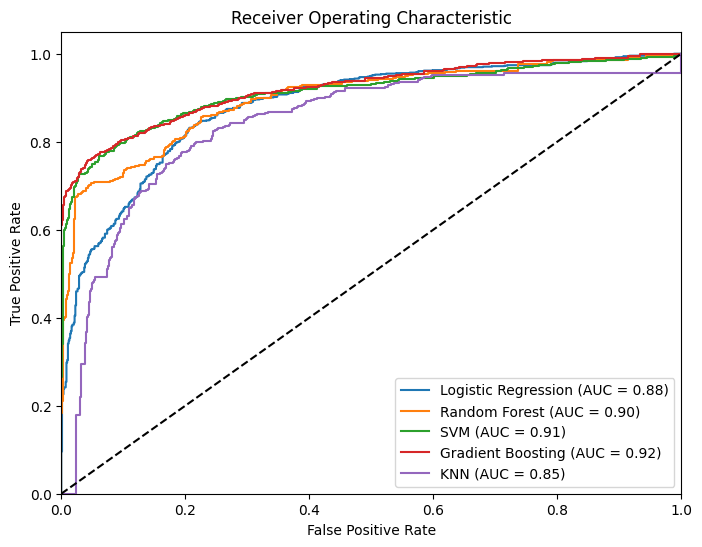

In [58]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})', drawstyle='steps-post')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})', drawstyle='steps-post')
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {roc_auc_svm:.2f})', drawstyle='steps-post')
plt.plot(fpr_gb, tpr_gb, label=f'Gradient Boosting (AUC = {roc_auc_gb:.2f})', drawstyle='steps-post')
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {roc_auc_knn:.2f})', drawstyle='steps-post')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [60]:
from sklearn.metrics import confusion_matrix

# Make predictions for each model
pred_lr = model_lr.predict(X_test_ml)
pred_rf = model_rf.predict(X_test_ml)
pred_svm = model_svm.predict(X_test_ml)
pred_gb = model_gb.predict(X_test_ml)
pred_knn = model_knn.predict(X_test_ml)
pred_lgbm = model_lgbm.predict(X_test_ml)

# Define a function to calculate sensitivity and specificity
def calculate_metrics(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    return sensitivity, specificity

# Calculate metrics for each model
sensitivity_lr, specificity_lr = calculate_metrics(y_test_ml, pred_lr)
sensitivity_rf, specificity_rf = calculate_metrics(y_test_ml, pred_rf)
sensitivity_svm, specificity_svm = calculate_metrics(y_test_ml, pred_svm)
sensitivity_gb, specificity_gb = calculate_metrics(y_test_ml, pred_gb)
sensitivity_knn, specificity_knn = calculate_metrics(y_test_ml, pred_knn)
sensitivity_lgbm, specificity_lgbm = calculate_metrics(y_test_ml, pred_lgbm)

# Print the results
print("Logistic Regression:")
print("Sensitivity:", sensitivity_lr)
print("Specificity:", specificity_lr)
print("\nRandom Forest:")
print("Sensitivity:", sensitivity_rf)
print("Specificity:", specificity_rf)
print("\nSVM:")
print("Sensitivity:", sensitivity_svm)
print("Specificity:", specificity_svm)
print("\nGradient Boosting:")
print("Sensitivity:", sensitivity_gb)
print("Specificity:", specificity_gb)
print("\nK-Nearest Neighbors:")
print("Sensitivity:", sensitivity_knn)
print("Specificity:", specificity_knn)
print("\nLightGBM:")
print("Sensitivity:", sensitivity_lgbm)
print("Specificity:", specificity_lgbm)

Logistic Regression:
Sensitivity: 0.7242937853107345
Specificity: 0.8579952267303103

Random Forest:
Sensitivity: 0.7807909604519774
Specificity: 0.834128878281623

SVM:
Sensitivity: 0.7672316384180791
Specificity: 0.9391408114558473

Gradient Boosting:
Sensitivity: 0.7694915254237288
Specificity: 0.9427207637231504

K-Nearest Neighbors:
Sensitivity: 0.4915254237288136
Specificity: 0.9463007159904535

LightGBM:
Sensitivity: 0.7548022598870057
Specificity: 0.9558472553699284


# SHAP

In [61]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 8.1 MB/s eta 0:00:00


In [62]:
import shap


model_lgbm = lgb.LGBMClassifier(n_estimators=500, learning_rate=0.01, max_depth=5, num_leaves=50,
                     random_state=0, min_child_weight=7, n_jobs=-1, verbosity=-1)
model_lgbm.fit(X_train_ml.values, y_train_ml)

# Initialize the SHAP explainer
explainer = shap.Explainer(model_lgbm, X_test_ml)

shap_values = explainer(X_test_ml)

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
 97%|=================== | 1663/1723 [00:56<00:02]       

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


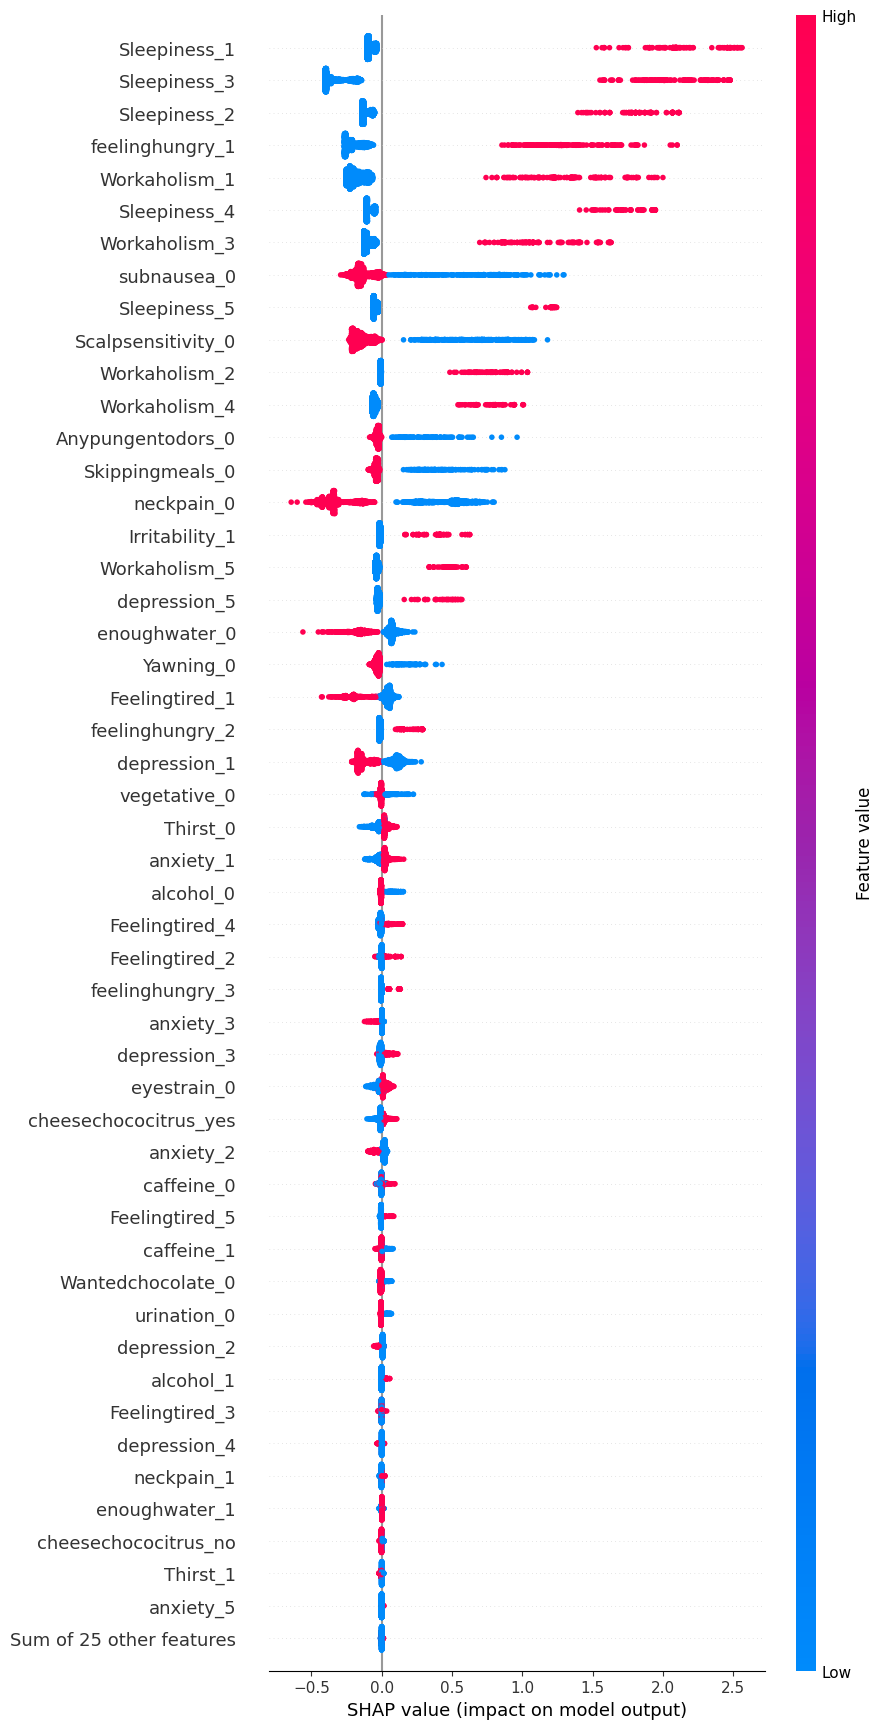

In [63]:
shap.plots.beeswarm(shap_values,  order=shap_values.abs.max(0), max_display=50)

# Metrics

In [64]:
print(classification_report(y_test_ml, model_lgbm.predict(X_test_ml)))

              precision    recall  f1-score   support

           0       0.79      0.96      0.86       838
           1       0.95      0.75      0.84       885

    accuracy                           0.85      1723
   macro avg       0.87      0.86      0.85      1723
weighted avg       0.87      0.85      0.85      1723



In [65]:
from sklearn.metrics import classification_report

# Make predictions for each model
pred_lr = model_lr.predict(X_test_ml)
pred_rf = model_rf.predict(X_test_ml)
pred_svm = model_svm.predict(X_test_ml)
pred_gb = model_gb.predict(X_test_ml)
pred_knn = model_knn.predict(X_test_ml)
pred_lgbm = model_lgbm.predict(X_test_ml)

# Generate classification reports
report_lr = classification_report(y_test_ml, pred_lr)
report_rf = classification_report(y_test_ml, pred_rf)
report_svm = classification_report(y_test_ml, pred_svm)
report_gb = classification_report(y_test_ml, pred_gb)
report_knn = classification_report(y_test_ml, pred_knn)
report_lgbm = classification_report(y_test_ml, pred_lgbm)

# Print classification reports
print("Logistic Regression:")
print(report_lr)
print("\nRandom Forest:")
print(report_rf)
print("\nSVM:")
print(report_svm)
print("\nGradient Boosting:")
print(report_gb)
print("\nK-Nearest Neighbors:")
print(report_knn)
print("\nLightGBM:")
print(report_lgbm)

Logistic Regression:
              precision    recall  f1-score   support

           0       0.75      0.86      0.80       838
           1       0.84      0.72      0.78       885

    accuracy                           0.79      1723
   macro avg       0.80      0.79      0.79      1723
weighted avg       0.80      0.79      0.79      1723


Random Forest:
              precision    recall  f1-score   support

           0       0.78      0.83      0.81       838
           1       0.83      0.78      0.81       885

    accuracy                           0.81      1723
   macro avg       0.81      0.81      0.81      1723
weighted avg       0.81      0.81      0.81      1723


SVM:
              precision    recall  f1-score   support

           0       0.79      0.94      0.86       838
           1       0.93      0.77      0.84       885

    accuracy                           0.85      1723
   macro avg       0.86      0.85      0.85      1723
weighted avg       0.86      0.

In [66]:
from sklearn.metrics import confusion_matrix

# Make predictions for each model
pred_lr = model_lr.predict(X_test_ml)
pred_rf = model_rf.predict(X_test_ml)
pred_svm = model_svm.predict(X_test_ml)
pred_gb = model_gb.predict(X_test_ml)
pred_knn = model_knn.predict(X_test_ml)
pred_lgbm = model_lgbm.predict(X_test_ml)

# Calculate metrics for each model
sensitivity_lr, specificity_lr = calculate_metrics(y_test_ml, pred_lr)
sensitivity_rf, specificity_rf = calculate_metrics(y_test_ml, pred_rf)
sensitivity_svm, specificity_svm = calculate_metrics(y_test_ml, pred_svm)
sensitivity_gb, specificity_gb = calculate_metrics(y_test_ml, pred_gb)
sensitivity_knn, specificity_knn = calculate_metrics(y_test_ml, pred_knn)
sensitivity_lgbm, specificity_lgbm = calculate_metrics(y_test_ml, pred_lgbm)

# Print the results
print("Logistic Regression:")
print("Sensitivity:", sensitivity_lr)
print("Specificity:", specificity_lr)
print("\nRandom Forest:")
print("Sensitivity:", sensitivity_rf)
print("Specificity:", specificity_rf)
print("\nSVM:")
print("Sensitivity:", sensitivity_svm)
print("Specificity:", specificity_svm)
print("\nGradient Boosting:")
print("Sensitivity:", sensitivity_gb)
print("Specificity:", specificity_gb)
print("\nK-Nearest Neighbors:")
print("Sensitivity:", sensitivity_knn)
print("Specificity:", specificity_knn)
print("\nLightGBM:")
print("Sensitivity:", sensitivity_lgbm)
print("Specificity:", specificity_lgbm)

Logistic Regression:
Sensitivity: 0.7242937853107345
Specificity: 0.8579952267303103

Random Forest:
Sensitivity: 0.7807909604519774
Specificity: 0.834128878281623

SVM:
Sensitivity: 0.7672316384180791
Specificity: 0.9391408114558473

Gradient Boosting:
Sensitivity: 0.7694915254237288
Specificity: 0.9427207637231504

K-Nearest Neighbors:
Sensitivity: 0.4915254237288136
Specificity: 0.9463007159904535

LightGBM:
Sensitivity: 0.7548022598870057
Specificity: 0.9558472553699284


# Visualization

In [67]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=fpr_lr, y=tpr_lr, mode='lines', name=f'Logistic Regression (AUC = {roc_auc_lr:.2f})'))
fig.add_trace(go.Scatter(x=fpr_rf, y=tpr_rf, mode='lines', name=f'Random Forest (AUC = {roc_auc_rf:.2f})'))
fig.add_trace(go.Scatter(x=fpr_svm, y=tpr_svm, mode='lines', name=f'SVM (AUC = {roc_auc_svm:.2f})'))
fig.add_trace(go.Scatter(x=fpr_gb, y=tpr_gb, mode='lines', name=f'Gradient Boosting (AUC = {roc_auc_gb:.2f})'))
fig.add_trace(go.Scatter(x=fpr_knn, y=tpr_knn, mode='lines', name=f'KNN (AUC = {roc_auc_knn:.2f})'))
fig.add_trace(go.Scatter(x=fpr_lgbm, y=tpr_lgbm, mode='lines', name=f'LightGBM (AUC = {roc_auc_lgbm:.2f})'))
# fig.add_trace(go.Scatter(x=fpr_deep, y=tpr_deep, mode='lines', name=f'FCModel (AUC = {roc_auc_deep:.2f})'))

fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines', name='Random Classifier', line=dict(dash='dash')))

fig.update_layout(
    xaxis_title='False Positive Rate',
    yaxis_title='True Positive Rate',
    title='Receiver Operating Characteristic',
    xaxis=dict(scaleanchor='x', scaleratio=1),
    yaxis=dict(scaleanchor='y', scaleratio=1),
    autosize=False,
    width=800,
    height=600
)

fig.show()

In [68]:
ap_scores = []

ap_lr = average_precision_score(y_test_ml, probs_lr)
precision_lr, recall_lr, _ = precision_recall_curve(y_test_ml, probs_lr)
ap_scores.append(ap_lr)


ap_rf = average_precision_score(y_test_ml, probs_rf)
precision_rf, recall_rf, _ = precision_recall_curve(y_test_ml, probs_rf)
ap_scores.append(ap_rf)

ap_svm = average_precision_score(y_test_ml, probs_svm)
precision_svm, recall_svm, _ = precision_recall_curve(y_test_ml, probs_svm)
ap_scores.append(ap_svm)

ap_gb = average_precision_score(y_test_ml, probs_gb)
precision_gb, recall_gb, _ = precision_recall_curve(y_test_ml, probs_gb)
ap_scores.append(ap_gb)

ap_knn = average_precision_score(y_test_ml, probs_knn)
precision_knn, recall_knn, _ = precision_recall_curve(y_test_ml, probs_knn)
ap_scores.append(ap_knn)

probs_lgbm = np.array(probs_lgbm)
ap_lgbm = average_precision_score(y_test_ml, probs_lgbm)
precision_lgbm, recall_lgbm, _ = precision_recall_curve(y_test_ml, probs_lgbm)
ap_scores.append(ap_lgbm)

In [69]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=recall_lr, y=precision_lr, mode='lines', name=f'Logistic Regression (AP = {ap_lr:.2f})'))
fig.add_trace(go.Scatter(x=recall_rf, y=precision_rf, mode='lines', name=f'Random Forest (AP = {ap_rf:.2f})'))
fig.add_trace(go.Scatter(x=recall_svm, y=precision_svm, mode='lines', name=f'SVM (AP = {ap_svm:.2f})'))
fig.add_trace(go.Scatter(x=recall_gb, y=precision_gb, mode='lines', name=f'Gradient Boosting (AP = {ap_gb:.2f})'))
fig.add_trace(go.Scatter(x=recall_knn, y=precision_knn, mode='lines', name=f'KNN (AP = {ap_knn:.2f})'))
fig.add_trace(go.Scatter(x=recall_lgbm, y=precision_lgbm, mode='lines', name=f'LightGBM (AP = {ap_lgbm:.2f})'))
# fig.add_trace(go.Scatter(x=recall_deep, y=precision_deep, mode='lines', name=f'FCModel (AP = {ap_deep:.2f})'))

fig.update_layout(
    title='Precision-Recall Curve',
    xaxis_title='Recall',
    yaxis_title='Precision',
    xaxis=dict(range=[0, 1]),
    yaxis=dict(range=[0, 1.05]),
    autosize=False,
    width=1200,
    height=800,
    legend=dict(x=0.6, y=0.1)
)

fig.show()

In [70]:
thresholds_lr = precision_recall_curve(y_test_ml, probs_lr)[-1]
f1_scores_lr = [f1_score(y_test_ml, probs_lr >= thr) for thr in thresholds_lr]

thresholds_rf = precision_recall_curve(y_test_ml, probs_rf)[-1]
f1_scores_rf = [f1_score(y_test_ml, probs_rf >= thr) for thr in thresholds_rf]

thresholds_svm = precision_recall_curve(y_test_ml, probs_svm)[-1]
f1_scores_svm = [f1_score(y_test_ml, probs_svm >= thr) for thr in thresholds_svm]
thresholds_gb = precision_recall_curve(y_test_ml, probs_gb)[-1]
f1_scores_gb = [f1_score(y_test_ml, probs_gb >= thr) for thr in thresholds_gb]

thresholds_knn = precision_recall_curve(y_test_ml, probs_knn)[-1]
f1_scores_knn = [f1_score(y_test_ml, probs_knn >= thr) for thr in thresholds_knn]

thresholds_lgbm = precision_recall_curve(y_test_ml, probs_lgbm)[-1]
f1_scores_lgbm = [f1_score(y_test_ml, probs_lgbm >= thr) for thr in thresholds_lgbm]

# thresholds_deep = precision_recall_curve(y_test, probs_deep)[-1]
# f1_scores_deep = [f1_score(y_test, probs_deep >= thr) for thr in thresholds_deep]

In [71]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=thresholds_lr, y=f1_scores_lr, mode='lines', name='Logistic Regression'))
fig.add_trace(go.Scatter(x=thresholds_rf, y=f1_scores_rf, mode='lines', name='Random Forest'))
fig.add_trace(go.Scatter(x=thresholds_svm, y=f1_scores_svm, mode='lines', name='SVM'))
fig.add_trace(go.Scatter(x=thresholds_gb, y=f1_scores_gb, mode='lines', name='Gradient Boosting'))
fig.add_trace(go.Scatter(x=thresholds_knn, y=f1_scores_knn, mode='lines', name='KNN'))
fig.add_trace(go.Scatter(x=thresholds_lgbm, y=f1_scores_lgbm, mode='lines', name='LightGBM'))
# fig.add_trace(go.Scatter(x=thresholds_deep, y=f1_scores_deep, mode='lines', name='FCModel'))

fig.update_layout(
    title='F1 Score Curve',
    xaxis=dict(title='Threshold'),
    yaxis=dict(title='F1 Score', range=[0, 1.05]),
    autosize=False,
    width=800,
    height=500
)

fig.show()